# Writing a Data Scientist Blog

In this notebook, I will be using my data scientist skills to write a blog that will test my skills that I've learned in the past few months to tackle a business related issue.

In this project I will follow the CRISP-DM process which will be recalled at the end of the notebook.

## Selecting a dataset

For this project I have selected the Seattle AirBnB dataset, which contains three csv files:
- **reviews.csv:**  contains the listing id, the review id, the date of the review, the reviewer id, reviewer name and the comment he/she wrote.
- **calendar.csv:** contains the listing id, the date for that it, whether it was available or not and the price.
- **listings.csv:** contains many information about the listings

## Questions about how the data can be used

By taking a quick look at the data in the [website](https://www.kaggle.com/airbnb/seattle/data) I decided to ask the following questions:

- Q1: What is the relationship between listing availability and price across the year?
- Q2: How does the top 500 earners compare to the lower 500?
- Q3: For the top 25 reviewers what is the average number of characters they use in their reviews?

## Data Preparation

In this part I will perform the data wrangling steps on the data set

### Gathering the data

The data will be collected from Kaggle using this [link](https://www.kaggle.com/airbnb/seattle/data), after that the three csv files will be loaded into a corresponding Pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [3]:
calendar = pd.read_csv('calendar.csv')
calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [4]:
listing = pd.read_csv('listings.csv')
listing.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


### Assessing the data

In this  part I will assess the data for missing values, duplicates, incorrect data type and outliers, I will assess each dataset on its own.


======================================================================================================================
#### Reviews dataset

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


<span style="color:blue">Review dataset has null values in the comments column, and the datatype for the columns is correct except for date which should be datetime datatype</span>

In [6]:
reviews[reviews.comments.isnull()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


In [7]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


In [8]:
for col in reviews.columns:
    print(col)
    print(reviews[col].duplicated().sum())

listing_id
81658
id
0
date
82919
reviewer_id
9119
reviewer_name
70469
comments
712


In [9]:
duplicated_review = reviews[reviews.comments.duplicated()].sort_values('comments')
duplicated_review.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
35051,3706719,17646574,2014-08-15,9679616,Mika,.
71206,8446766,48352031,2015-09-25,43680915,Michael,.
67811,488268,12690425,2014-05-08,6192400,Jackie,.
77823,8939503,55126859,2015-11-28,45110413,Jian,.
51426,777159,13335174,2014-05-25,12937418,Maxime,.
13890,2274086,40490627,2015-07-31,29884964,Sarah,:)
76252,2593263,37448795,2015-07-07,2893286,Oscar,A great stay once again at the Spring Street C...
71207,8446766,48468933,2015-09-26,43680915,Michael,Awesome!
79952,365550,1964218,2012-08-12,3137200,Zahi,Dirk and Jaq where very accommodating and frie...
80195,365550,20597726,2014-10-02,9232379,Austin,Dirk and Jaq's place was great for a traveler ...


In [10]:
duplicated_review.tail(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
10271,1900698,9383329,2013-12-25,8594511,Shuping,nice place
41726,3882930,49701101,2015-10-05,29304092,Han,nice place
6167,4022127,57395107,2015-12-25,50701577,Shiwen,nice place
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN


<span style="color:blue">As we can see there are multiple reviews that are short and generic, while there are reviews that are not useful</span>

In [11]:
mask = reviews['comments'].str.len() <= 20
df = reviews.loc[mask]
df

,listing_id,id,date,reviewer_id,reviewer_name,comments
288,7550234,47535547,2015-09-20,40619236,Theo,Sehr gut
291,7550234,49300785,2015-10-02,45425020,Dylan,The Blue room rocks!
471,1205666,50058542,2015-10-08,34925128,Aaron_aaron,Nice house!
472,1205666,50156180,2015-10-09,34925128,Aaron_aaron,Nice house!
527,4681885,37234695,2015-07-05,1777517,Zoe,Very courteous.
...,...,...,...,...,...,...
82659,3552523,24626947,2014-12-31,20133919,Kelsey,Great
82961,92835,8566980,2013-11-05,9176902,Daniel,Great location!
83709,1029680,35610731,2015-06-20,35343492,Eric,Great place to stay!
83869,2075094,16639646,2014-07-30,18112400,Eva,Yes -


Short comments are usually filled with typos and do not convey useful information.

======================================================================================================================
#### Calendar dataset

In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


<span style="color:blue">Calendar dataset has null values in the price column, and the datatype for the columns is correct except for date which should be datetime datatype and price which should be float</span>

In [13]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [14]:
calendar[calendar.price.isnull()].query('available == "t"')

,listing_id,date,available,price


In [15]:
(calendar.price == 0).sum()

0

<span style="color:blue">It looks like whenever the listing availability is f, the price is null and on the other hand when availability is t the price is a number greater than 0. It doesn't look like there are listing with a price of $0</span>

======================================================================================================================
#### Listing dataset

In [16]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

<span style="color:blue">As we can see, there are 92 columns in the listing dataset, and many of these columns have null values in them. Also, the datatype for some of these columns needs to be fixed </span>

In [17]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [18]:
listing.scrape_id.unique()

array([20160104002432], dtype=int64)

In [19]:
listing.last_scraped.unique()

array(['2016-01-04'], dtype=object)

In [20]:
for col in listing.columns:
    if listing[col].duplicated().sum() == 3817:
        print(col)
        print(listing[col].unique())
    

scrape_id
[20160104002432]
last_scraped
['2016-01-04']
experiences_offered
['none']
market
['Seattle']
country_code
['US']
country
['United States']
has_availability
['t']
calendar_last_scraped
['2016-01-04']
requires_license
['f']
license
[nan]
jurisdiction_names
['WASHINGTON']


In [21]:
for col in listing.columns:
    if listing[col].duplicated().sum() == 3816:
        print(col)
        print(listing[col].unique())

state
['WA' 'wa']
is_location_exact
['t' 'f']
instant_bookable
['f' 't']
require_guest_profile_picture
['f' 't']
require_guest_phone_verification
['f' 't']


In [22]:
for col in listing.columns:
    if listing[col].duplicated().sum() == 3815:
        print(col)
        print(listing[col].unique())

host_acceptance_rate
['100%' nan '0%']
host_is_superhost
['f' 't' nan]
host_has_profile_pic
['t' 'f' nan]
host_identity_verified
['t' 'f' nan]
room_type
['Entire home/apt' 'Private room' 'Shared room']
cancellation_policy
['moderate' 'strict' 'flexible']


======================================================================================================================
### Cleaning

#### Reviews Dataset
<span style="color:blue">For now, I will drop the comments with null value and change date to datetime datatype</span>

In [23]:
reviews.dropna(inplace=True)
reviews.date = reviews.date.apply(pd.to_datetime)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     84831 non-null  int64         
 1   id             84831 non-null  int64         
 2   date           84831 non-null  datetime64[ns]
 3   reviewer_id    84831 non-null  int64         
 4   reviewer_name  84831 non-null  object        
 5   comments       84831 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


#### Calendar Dataset
<span style="color:blue">For now, I will change date to datetime datatype and price to float64 and then I will replace the null values with 0.0, I also need to remove the dollar sign from price</span>

In [24]:
import time
start = time.time()
calendar.date = calendar.date.apply(pd.to_datetime)
calendar.fillna('$0.0',inplace=True)
calendar.price = calendar.price.astype(str).apply(lambda x: x.replace(',', '').strip('$')).astype(float)
print(time.time()-start)

calendar.info()

110.60967969894409
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB



#### Listing Dataset
<span style="color:blue">For now, I will drop the columns with only single values (e.g. licence, scrape_id) and columns that have 2 values that are actually the same (e.g. state). For the null values I will use amputation</span>

In [25]:
for col in listing.columns:
    if listing[col].duplicated().sum() == 3817:
        listing.drop(col,axis=1,inplace=True)

In [26]:
listing.drop('state',axis=1,inplace=True)

In [27]:
for col in listing.columns:
    if listing[col].duplicated().sum() >= 3800:
        print(listing[col].value_counts(dropna=False))

within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64
100%    3044
NaN      773
0%         1
Name: host_acceptance_rate, dtype: int64
f      3038
t       778
NaN       2
Name: host_is_superhost, dtype: int64
t      3809
f         7
NaN       2
Name: host_has_profile_pic, dtype: int64
t      2997
f       819
NaN       2
Name: host_identity_verified, dtype: int64
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64
Seattle 

In [28]:
# drop columns with very few variation or filled with nulls
listing.drop(['host_acceptance_rate','host_has_profile_pic','city','smart_location','square_feet'],axis=1,inplace=True)


In [29]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   name                              3818 non-null   object 
 3   summary                           3641 non-null   object 
 4   space                             3249 non-null   object 
 5   description                       3818 non-null   object 
 6   neighborhood_overview             2786 non-null   object 
 7   notes                             2212 non-null   object 
 8   transit                           2884 non-null   object 
 9   thumbnail_url                     3498 non-null   object 
 10  medium_url                        3498 non-null   object 
 11  picture_url                       3818 non-null   object 
 12  xl_pic

In [30]:
listing.rename(columns={"id": "listing_id"},inplace=True)

In [31]:
for date in ['host_since','first_review','last_review']:
    listing[date] = listing[date].apply(pd.to_datetime)
for price in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']:
    listing[price] = listing[price].astype(str).apply(lambda x: x.replace(',', '').strip('$')).astype(float)

======================================================================================================================

## Analysis

### Q1: What is the relationship between listing availability and price across the year

In [32]:
calendar.available = pd.get_dummies(calendar.available)['f']

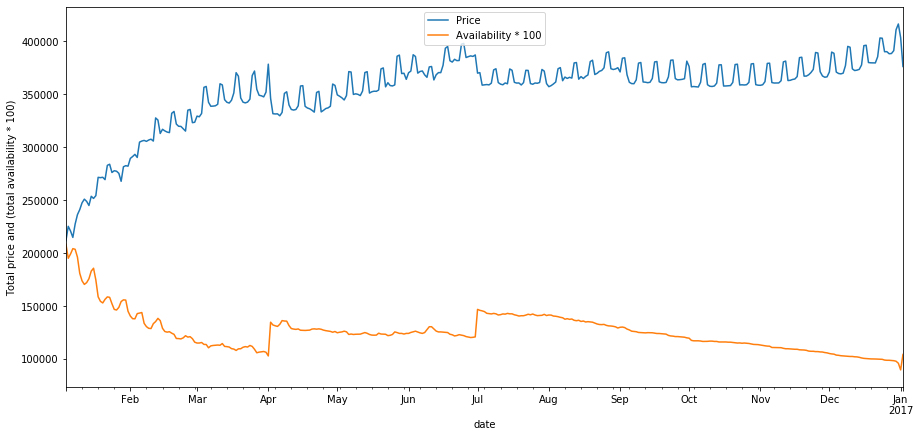

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
calendar.groupby(['date']).sum()['price'].plot(label='Price',ax=ax)
(calendar.groupby(['date']).sum()['available']*100).plot(ax=ax) # multiply by 100 to make the values appear close to price
ax.set_ylabel('Total price and (total availability * 100)')
ax.legend(['Price','Availability * 100'],loc='upper center');

### Q2: How does the top 500 earners compare to the lower 500?

In [34]:
top_earners = calendar.groupby('listing_id').sum().sort_values(by='price',ascending=False).head(500)
top_earners

,available,price
listing_id,,
7733192,6.0,362941.0
4825073,7.0,358000.0
2720963,0.0,346750.0
4464824,3.0,329518.0
3308979,145.0,286400.0
...,...,...
613151,0.0,62725.0
10125020,8.0,62475.0
9030406,18.0,62323.0


In [35]:
top_earners_dataset = listing[listing.listing_id.isin(top_earners.index)]

In [36]:
low_earners = calendar.groupby('listing_id').sum().sort_values(by='price',ascending=False).tail(500)
low_earners

,available,price
listing_id,,
7402861,240.0,5625.0
4025593,223.0,5615.0
9096972,299.0,5610.0
9887142,295.0,5600.0
9866461,308.0,5580.0
...,...,...
8253758,365.0,0.0
1762354,365.0,0.0
3793406,365.0,0.0


In [37]:
low_earners_dataset = listing[listing.listing_id.isin(low_earners.index)]

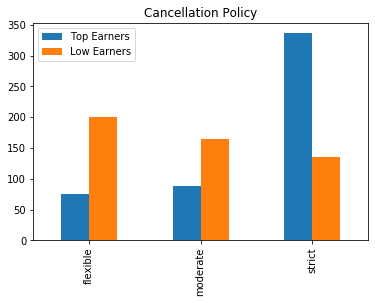

In [38]:
y1 = top_earners_dataset.cancellation_policy.value_counts()
y2 = low_earners_dataset.cancellation_policy.value_counts()
top_bot = pd.DataFrame({'Top Earners':y1,'Low Earners':y2})
top_bot.plot.bar(title="Cancellation Policy");

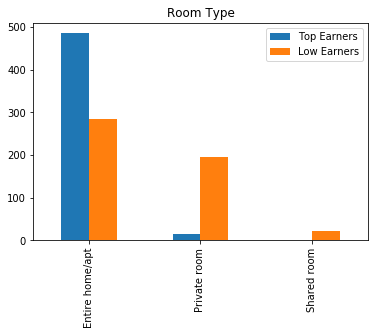

In [39]:
y1 = top_earners_dataset.room_type.value_counts()
y2 = low_earners_dataset.room_type.value_counts()
top_bot = pd.DataFrame({'Top Earners':y1,'Low Earners':y2})
top_bot.plot.bar(title="Room Type");

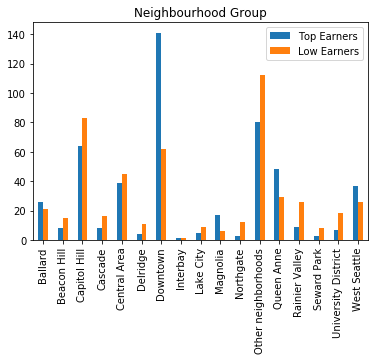

In [40]:
y1 = top_earners_dataset.neighbourhood_group_cleansed.value_counts()
y2 = low_earners_dataset.neighbourhood_group_cleansed.value_counts()
top_bot = pd.DataFrame({'Top Earners':y1,'Low Earners':y2})
top_bot.plot.bar(title="Neighbourhood Group");

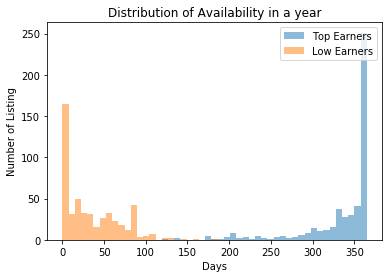

In [41]:

y1 = top_earners_dataset.availability_365
y2 = low_earners_dataset.availability_365

bins = np.linspace(0, 365, 50)

plt.hist(y1, bins, alpha=0.5, label='Top Earners')
plt.hist(y2, bins, alpha=0.5, label='Low Earners')
plt.legend(loc='upper right')
plt.title('Distribution of Availability in a year')
plt.xlabel('Days')
plt.ylabel('Number of Listing')
plt.show()

### Q3: For the top 25 reviewers what is the average number of characters they use in their reviews?

In [42]:
# I will consider reviewers with multipule long reviews to be among the top
long_review = reviews[reviews.comments.str.len() > 100]
long_review['char_count'] = long_review.comments.str.len()
long_review

C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,listing_id,id,date,reviewer_id,reviewer_name,comments,char_count
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,390
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",386
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,278
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,334
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ...",173
...,...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...,698
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...,196
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del...",201
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si...",350


In [43]:
multi_reviews = long_review.groupby('reviewer_id').count().sort_values('char_count',ascending=False).head(25).index

top20 = long_review[long_review.reviewer_id.isin(multi_reviews)]

top20_mean = top20.groupby('reviewer_id').mean().sort_values('char_count',ascending=False)['char_count']

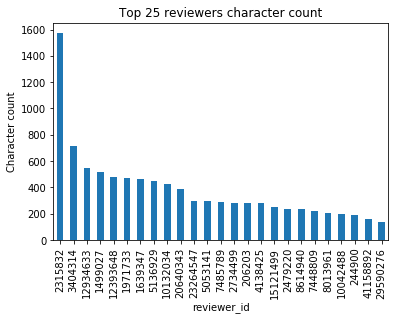

<Figure size 864x720 with 0 Axes>

In [54]:
top20_mean.plot.bar(title = "Top 25 reviewers character count")
plt.ylabel('Character count')
plt.figure(figsize=(12,10));